> # Face Mask Detection

In [1]:
import os
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense
from tensorflow import keras

In [2]:
categories = ['with_mask','without_mask']

## Seeing pictures Randomly

file and path ('167-with-mask.jpg', 'Data\\data\\with_mask'),
 --- file path from which I am reading picture and loading it from Data\data\with_mask\167-with-mask.jpg


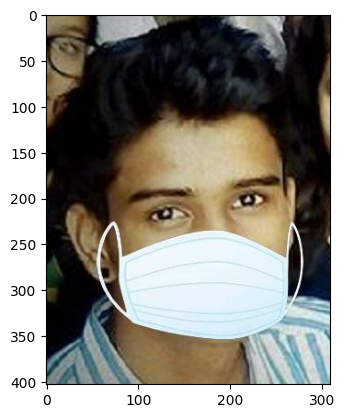

file and path ('50.jpg', 'Data\\data\\without_mask'),
 --- file path from which I am reading picture and loading it from Data\data\without_mask\50.jpg


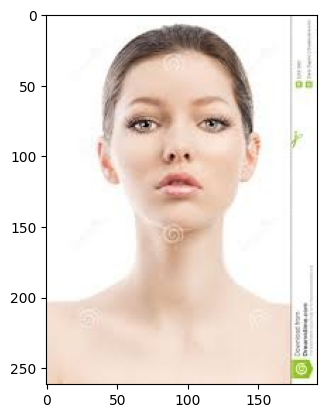

In [3]:
for cat in categories:
    path = os.path.join('Data\data',cat) # Here I am just joining 'Data\data\with_mask' this path
    files = os.listdir(path=path)
    random.shuffle(files)

    for file in files:
        file_path = os.path.join(path, file) # Here I am joining 'Data\data\with_mask\0-with-mask.jpg' this path
        print(f'file and path {file,path},\n --- file path from which I am reading picture and loading it from {file_path}')

        img = cv2.imread(file_path)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))   # Convert BGR to RGB
        plt.show()
        break
    

In [4]:
for cat in categories:
    path = os.path.join('Data\data',cat)
    files = os.listdir(path)
    label = categories.index(cat)
    print(label,cat)

0 with_mask
1 without_mask


In [5]:
# Assigning labels to each picture and converting into array

data = []
for cat in categories:
    path = os.path.join('Data\data',cat) # Here I am just joining 'Data\data\with_mask' this path
    files = os.listdir(path=path)
    label = categories.index(cat)


    for file in files:
        file_path = os.path.join(path, file) # Here I am joining 'Data\data\with_mask\0-with-mask.jpg' this path
        img = cv2.imread(file_path)
        img = cv2.resize(img,dsize=(224,224)) # this because VGG16 takes images in the shape of 224x224
        
        data.append([img,label])

In [6]:
len(data)

1352

In [7]:
# segregating labels and images from data
X = []
y = []

for features , label in data:
    X.append(features)
    y.append(label)

In [8]:
len(X) , len(y)

(1352, 1352)

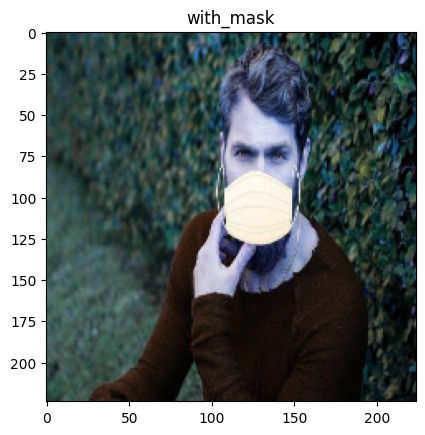

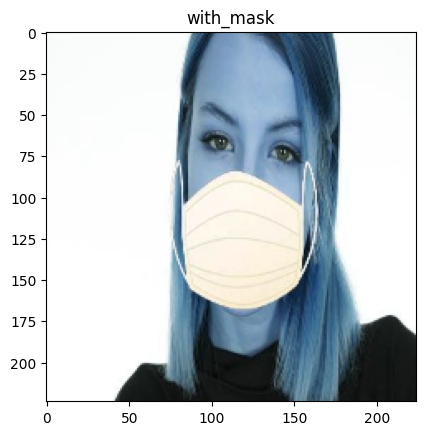

In [9]:
for i in range(0,2):
    image_array = X[i]
    # print(f'numpy array of image - \n  {image_array} \n \n and its label-  {y[i]} means with_mask')
    plt.imshow(image_array)
    if y[i] == 0:
        plt.title('with_mask')
    else:
        plt.title('withOut mask')
    plt.show()

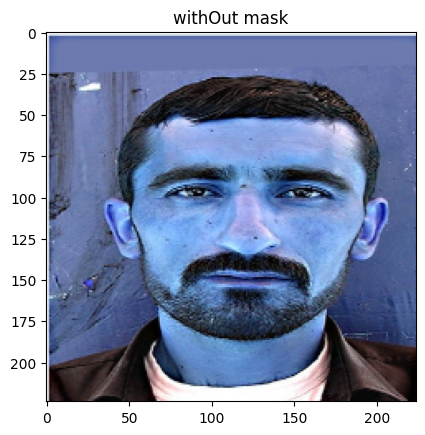

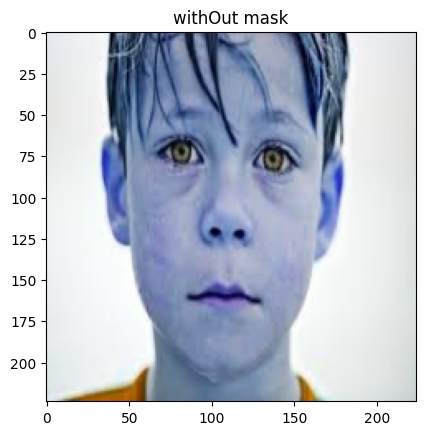

In [10]:
for i in range(1000,1002):
    image_array = X[i]
    # print(f'numpy array of image - \n  {image_array} \n \n and its label-  {y[i]} means withOut_mask')
    if y[i] == 0:
        plt.title('with_mask')
    else:
        plt.title('withOut mask')
    plt.imshow(image_array)
    plt.show()

In [11]:
## converting all into numpy array
X= np.array(X)
y = np.array(y)
print(f'{X.shape,y.shape} ')

((1352, 224, 224, 3), (1352,)) 


In [12]:
# this means I have the values in the range of 0 - 255
X[0].max()

255

In [13]:
""" Here 1352 shows that I have 1352 Images, 244 shows that the image size is 224 and lastly 3 shows that I have 3 layered Image means RGB Image(Or 3 channels)"""
print(f' Here 1352 shows that I have 1352 Images from this code - {X.shape[0]}')
print(f' 244 shows that the pixel size of image from this code - {X.shape[1]}')
print(f' lastly 3 shows that I have 3 layered Image means RGB Image(Or 3 channels) from this code - {X.shape[3]}')
print(f' \n X shape - {X.shape}')

 Here 1352 shows that I have 1352 Images from this code - 1352
 244 shows that the pixel size of image from this code - 224
 lastly 3 shows that I have 3 layered Image means RGB Image(Or 3 channels) from this code - 3
 
 X shape - (1352, 224, 224, 3)


In [14]:
# Scaling X
X = X/255

In [15]:
def prepare_Data(dir):

    """ This function is converting all the images into numpy array and
      assigning label as 0(with mask) and 1(without mask)"""

    data = []
    categories = ['with_mask','without_mask']
    X = []
    y = []

    for cat in categories:
        path = os.path.join(dir,cat)
        files = os.listdir(path)
        label = categories.index(cat)
        
        for file in files:
            file_path = os.path.join(path,file)
            img = cv2.imread(file_path)
            img = cv2.resize(img,dsize=(224,224))

            data.append([img,label])
        
    random.shuffle(data) # to don't make model biased

    # segregating features and labels
    for features , label in data:
        X.append(features)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    X = X/255

    return X , y

X , y = prepare_Data(dir='Data\data')


In [16]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [17]:
# Train TEst Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y ,test_size=0.2, random_state=42)

In [18]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1081, 224, 224, 3), (1081,), (271, 224, 224, 3), (271,))

## Model Training using `TRANSFER LEARNING`

In [19]:
vgg = VGG16()

In [20]:
print(f'{vgg.summary()} \n \n--------This is the complete model ')

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
vgg.layers[:-1]

In [22]:
model = Sequential()
# removing last layer( prediction layer )
# And also this VGG16 is a functional model so I have also converted it into Sequential model
for layer in vgg.layers[:-1]:
    model.add(layer=layer)
print(f'{model.summary()} \n \n--------model with replaced 1 last Prediction layer ')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [23]:
# Freezing trainable Parameters
for trainable in model.layers:
    trainable.trainable = False

In [24]:
print(f'{model.summary()} \n \n--------Model with freezed parameters')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [25]:
# Adding my dense layer
model.add(Dense(
    units=1,activation='sigmoid', name = 'Prediction_Layer'
))

In [26]:
print(f'{model.summary()} \n \n--------Added 1 Dense Layer (for Prediction) ')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [27]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit(x=X_train,y=y_train,epochs=5,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/5
34/34 [==============================] - 203s 6s/step - loss: 0.6171 - accuracy: 0.6660 - val_loss: 0.4306 - val_accuracy: 0.8893
Epoch 2/5
34/34 [==============================] - 184s 5s/step - loss: 0.3537 - accuracy: 0.9140 - val_loss: 0.2975 - val_accuracy: 0.9299
Epoch 3/5
34/34 [==============================] - 186s 6s/step - loss: 0.2631 - accuracy: 0.9352 - val_loss: 0.2425 - val_accuracy: 0.9410
Epoch 4/5
34/34 [==============================] - 349s 10s/step - loss: 0.2360 - accuracy: 0.9297 - val_loss: 0.2334 - val_accuracy: 0.9262
Epoch 5/5
34/34 [==============================] - 303s 9s/step - loss: 0.1889 - accuracy: 0.9436 - val_loss: 0.1874 - val_accuracy: 0.9557


Text(0.5, 1.0, 'val_loss- 0.187 and loss- 0.189')

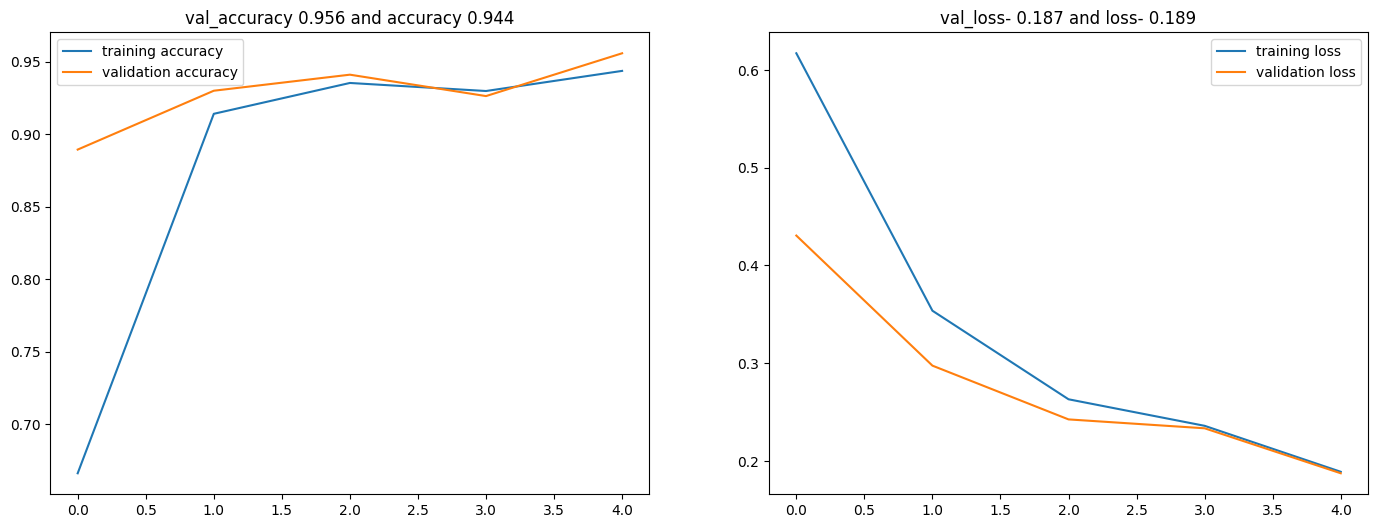

In [29]:
plt.subplots(nrows=1,ncols=2,figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][4],ndigits=3)} and accuracy {round(history.history["accuracy"][4],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][4],ndigits=3)} and loss- {round(history.history["loss"][4],ndigits=3)}')

In [30]:
model.save('Face_detection.H5')

INFO:tensorflow:Assets written to: Face_detection.H5\assets


INFO:tensorflow:Assets written to: Face_detection.H5\assets
